In [1]:
import matplotlib.pyplot as plt 
import seaborn as sns
import pandas as pd
import numpy as np

from sklearn import datasets
from sklearn import manifold

%matplotlib inline 

In [2]:
# import MNIST dataset using the sklearn built-in function (fetch.openml())

data = datasets.fetch_openml(
                'mnist_784', 
                version=1, 
                return_X_y=True
)
input_pixels, targets = data
targets = targets.astype(int)

In [3]:
# the inputs is 7000 images of dimensions (28*28) resulting in matrix 7000 images * 784 image pixels
input_pixels.shape

(70000, 784)

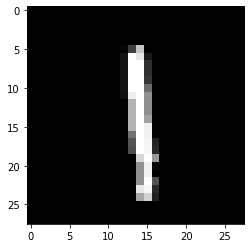

In [4]:
# displaying image number 8 after reshaping its flattened array to the original image dimensions
sample_image = input_pixels.iloc[8, :]
sample_image = sample_image.values.reshape(28, 28)
plt.imshow(sample_image, cmap='gray')

### t-SNE for MNIST dataset

In [5]:
# creat a tsne for the data in two dimenional space
tsne = manifold.TSNE(n_components=2, learning_rate='auto',
                     init='random', random_state=42)
transformed_data = tsne.fit_transform(input_pixels.iloc[:3000, :])

In [6]:
#convert the numpy to a pandas dataframe
#(2 columns of resulting t-SNE decomposition, + 1 column of the actual data)
tsne_df = pd.DataFrame(
        np.column_stack((transformed_data, targets[:3000])),
        columns=["x", "y", "targets"]
)
tsne_df.loc[:, "targets"] = tsne_df.targets.astype(int)

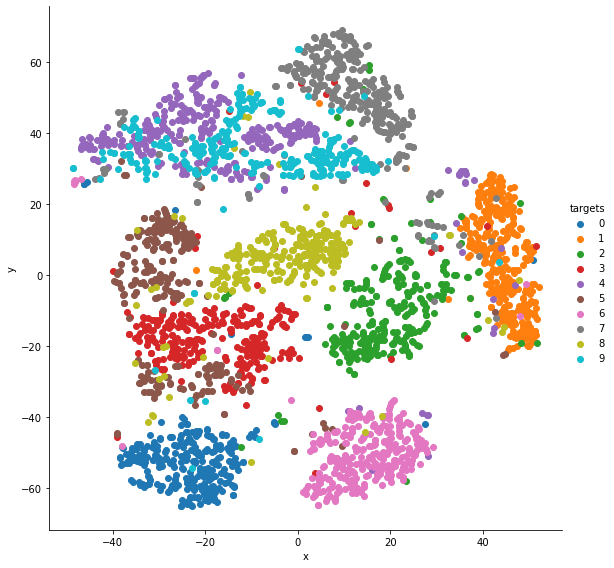

In [10]:
grid = sns.FacetGrid(tsne_df, hue="targets", height=8)
grid.map(plt.scatter, "x", "y").add_legend()
plt.savefig('t-SNE_MNIST.jpg')

<Figure size 432x288 with 0 Axes>